In [38]:
# Constants
KEYWORD="data scientist"
COUNTRY = "United States"
NUM_OF_JOBS= 1000

DF_PATH_PKL = f"../data/raw/1_{NUM_OF_JOBS}_jobs_{KEYWORD}_{COUNTRY}_cleaned_data_df.pkl"
DF_PATH_CSV = f"../data/raw/1_{NUM_OF_JOBS}_jobs_{KEYWORD}_{COUNTRY}_cleaned_data_df.csv"

EXPORT_PATH_PKL =  f"../data/raw/2_{NUM_OF_JOBS}_jobs_{KEYWORD}_{COUNTRY}_eda_data_df.pkl"
EXPORT_PATH_CSV = f"../data/raw/2_{NUM_OF_JOBS}_jobs_{KEYWORD}_{COUNTRY}_eda_data_df.csv"

FIG_DIR = "../reports/figures"

# REPLACED_DICT = {
#     'Founded' : {'Nonprofit Organization' : -1, 'Government' : -1, 'Company - Private' : -1,
#                  'Government' : -1, 'Company - Public': -1}
# }

In [34]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [6, 3] 
# plt.rcParams["xtick.labelsize"] = 7

%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go # Graph objects are the low-level building blocks of figures which you can use instead of Plotly Express for greater control.
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# for nlp analyssis
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [3]:
raw_df = pd.read_pickle(DF_PATH_PKL)
df = raw_df.copy()
display(df.head(2))
display(df.shape)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Comp_Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,hourly,employer_provided,job_state,Comp_Age,python_yn,sql_yn,excel_yn,tableau_yn,aws_yn,git_yn,spark_yn
0,Data Scientist - REMOTE,$87K - $121K (Glassdoor est.),There are over 7 billion people on this planet...,4,John Deere,"Washington, DC",John May,10000+ Employees,1837,Company - Public,Machinery Manufacturing,Manufacturing,$10+ billion (USD),-1,87,121,104.0,0,0,Washington,185,1,1,0,1,1,1,1
1,Junior Data Scientist,$70K - $108K (Glassdoor est.),Job #:\nreq19774\n\nOrganization:\nWorld Bank\...,-1,World Bank Group,"Washington, DC",-1,10000+ Employees,-1,-1,-1,-1,-1,-1,70,108,89.0,0,0,Washington,-1,1,0,1,0,1,1,0


(835, 28)

In [4]:
df.sample(1).iloc[0]

Job Title                                             Data Scientist I
Salary Estimate                          $91K - $122K (Glassdoor est.)
Job Description      The position is described below. If you want t...
Rating                                                               3
Company Name                                          Truist Financial
Location                                             Mountain View, CA
Headquarters                                    William H. Rogers, Jr.
Comp_Size                                             10000+ Employees
Founded                                                           2019
Type of ownership                                     Company - Public
Industry                                 Investment & Asset Management
Sector                                              Financial Services
Revenue                                        $5 to $10 billion (USD)
Competitors                                                         -1
min_sa

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Comp_Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'hourly', 'employer_provided',
       'job_state', 'Comp_Age', 'python_yn', 'sql_yn', 'excel_yn',
       'tableau_yn', 'aws_yn', 'git_yn', 'spark_yn'],
      dtype='object')

In [6]:
# Invesigate the questionable objects columns
questionable_cols = ['Job Title','Company Name']

for col in questionable_cols:
    print(col)
    print(df[col].unique().tolist())
    print('--------------------------------------------')
    print()

Job Title
['Data Scientist - REMOTE', 'Junior Data Scientist', 'Data Scientist or Bioinformatician (remote)', 'Data Scientist', 'Jr. Data Scientist', 'Associate Data Scientist, 2023 Graduate', 'Remote Data Scientist', 'Data Scientist - Associate', 'Analyst, Data Scientist', 'Data Scientist I', 'Data Scientist- Personalized Healthcare', 'Data Scientist I (Remote)', 'Data Scientist I, Risk Analytics', 'Data Scientist (Remote)', 'Data Scientist, AI Services - Mastercard Launch 2023', 'Principal Data Scientist, Customer Analytics', 'Data Scientist Remote', 'Data Scientist (REMOTE)', 'Data Scientist (Virtual)', 'Data Scientist / Quantitative Analyst', 'Data scientist - Junior AI research Analyst', 'Principal Data Scientist', 'Data Scientist Analyst', 'Data Scientist, Creator Promotion', 'CCB Data & Analytics - Data Consumption & Product Operations Team - Data Scientist Analyst Expert - New York, Jersey City, and/or Wilmington', 'Data Scientist - Entry to Expert Level (Maryland Location)', '

In [7]:
# Analysis on job title and it's level
def title_siplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'business intelligence' in title.lower():
        return 'business intelligence'
    elif 'financial analyst' in title.lower():
        return 'financial analyst'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or \
                'lead' in title.lower() or 'principal' in title.lower() or 'expert' in title.lower():
        return 'senior'
    elif 'jr'in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'jr'
    else:
        return 'na'

### --> Tasks to Do
#####  *** Job title and seniority
#####  *** Job description length
#####  *** hourly wage to annual
#####  *** remove ne line from job title

In [8]:
#####  *** Job title and seniority
df['job_simp'] = df['Job Description'].apply(title_siplifier)       # New Feature : jpb simplicity
display(df['job_simp'].value_counts())                              # Count Eatch Job
# display(df[df['job_simp']=='na'][['Job Title','job_simp']])

data scientist    666
mle                68
analyst            36
data engineer      34
na                 31
Name: job_simp, dtype: int64

In [9]:
#####  *** Job title and seniority
df['seniority'] = df['Job Title'].apply(seniority)              # New Feature  : level of job
display(df['seniority'].value_counts())
# display(df[df['seniority']=='senior'][['Job Title','seniority']])

na        644
senior    103
jr         88
Name: seniority, dtype: int64

In [10]:
#####  *** Job description length
# Perhaps the length of the description is giving an indication of the salary
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))     # New Feature : Job Description Length
df['desc_len'][:10]

0     5645
1     6232
4     2511
5     4076
10    1124
12    3965
15    1365
16    6440
17    5127
20    4161
Name: desc_len, dtype: int64

In [11]:
#####  *** hourly wage to annual
# At raw collected data, the hourly salary dollar/houre while the annual was thousand-dollar/year
# To convert hourly to annual, multipy by 2000 hours/year (roughly)
# As we represent the salary values devided by 1000, so multiply hourly by 2
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly'] == 1 else x['min_salary'],axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly'] == 1 else x['max_salary'],axis=1)

### Visually verify results

In [12]:
i = df.sample(1).index[0]
display( raw_df[raw_df['hourly'] == 1][['hourly','min_salary','max_salary']])
display( df[df['hourly'] == 1][['hourly','min_salary','max_salary']])

# display( raw_df[raw_df['hourly'] != 1][['hourly','min_salary','max_salary']])

,hourly,min_salary,max_salary
15,1,50,55
51,1,20,20
57,1,70,80
89,1,70,80
100,1,70,80
127,1,70,80
157,1,70,80


,hourly,min_salary,max_salary
15,1,100,110
51,1,40,40
57,1,140,160
89,1,140,160
100,1,140,160
127,1,140,160
157,1,140,160


In [13]:
df.describe()

,Rating,Founded,Competitors,min_salary,max_salary,avg_salary,hourly,employer_provided,Comp_Age,python_yn,sql_yn,excel_yn,tableau_yn,aws_yn,git_yn,spark_yn,desc_len
count,835.000000,835.000000,835.0,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.00000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,2.855090,1607.070659,-1.0,94.603593,142.664671,118.098204,0.008383,0.428743,51.336527,0.79521,0.565269,0.329341,0.276647,0.208383,0.353293,0.203593,4998.712575
std,1.648146,755.178249,0.0,21.931378,36.013588,26.357495,0.091230,0.495193,62.945967,0.40379,0.496019,0.470256,0.447608,0.406396,0.478279,0.402911,2434.260978
min,-1.000000,-1.000000,-1.0,40.000000,40.000000,20.000000,0.000000,0.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1124.000000
25%,3.000000,1837.000000,-1.0,76.000000,120.000000,97.000000,0.000000,0.000000,8.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3875.000000
50%,3.000000,1963.000000,-1.0,92.000000,133.000000,114.000000,0.000000,0.000000,20.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4981.000000
75%,4.000000,2004.000000,-1.0,105.000000,160.000000,129.500000,0.000000,1.000000,97.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5718.500000
max,4.000000,2021.000000,-1.0,150.000000,350.000000,225.000000,1.000000,1.000000,397.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14965.000000


### Doing Some Analysis


<AxesSubplot:>

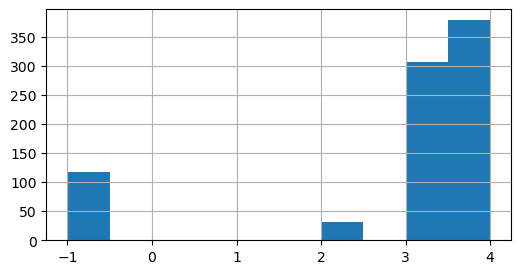

In [14]:
df['Rating'].hist()

<AxesSubplot:>

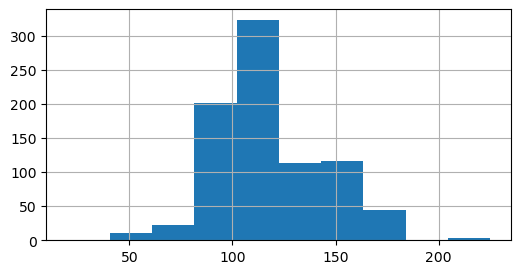

In [15]:
df.avg_salary.hist()

<AxesSubplot:>

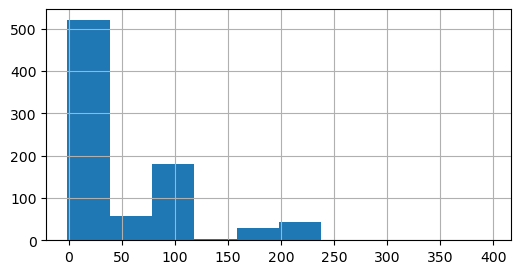

In [16]:
df.Comp_Age.hist()

<AxesSubplot:>

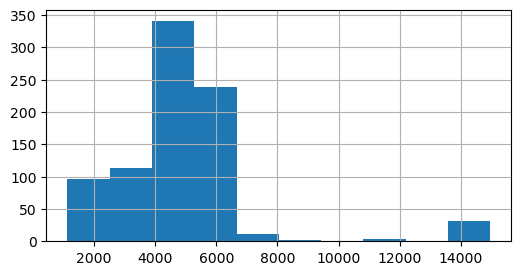

In [17]:
df.desc_len.hist()

<AxesSubplot:>

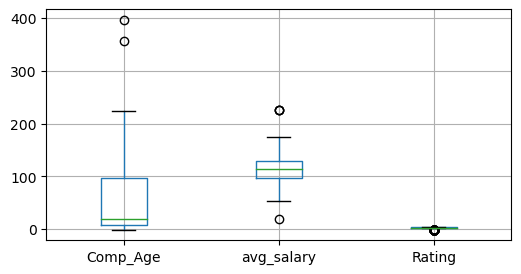

In [18]:
df.boxplot(column=['Comp_Age','avg_salary','Rating'])

<AxesSubplot:>

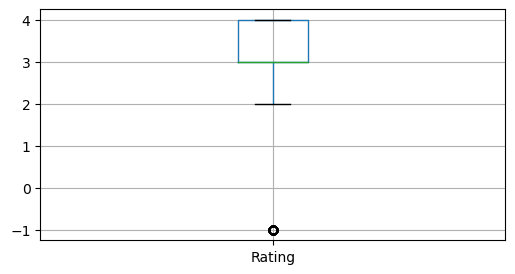

In [19]:
df.boxplot(column=['Rating'])

In [20]:
numerical_df = df[['Comp_Age','avg_salary','desc_len','Rating']]
numerical_df.corr()

,Comp_Age,avg_salary,desc_len,Rating
Comp_Age,1.000000,-0.025004,0.023854,0.295006
avg_salary,-0.025004,1.000000,0.136301,0.081366
desc_len,0.023854,0.136301,1.000000,0.091123
Rating,0.295006,0.081366,0.091123,1.000000


<AxesSubplot:>

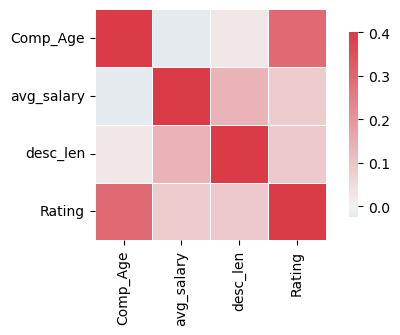

In [21]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(numerical_df.corr(),cmap=cmap,
            vmax=0.4, center = 0, square=True, linewidths=0.5, cbar_kws={"shrink":0.8})

Graph for Company Name: total = 75


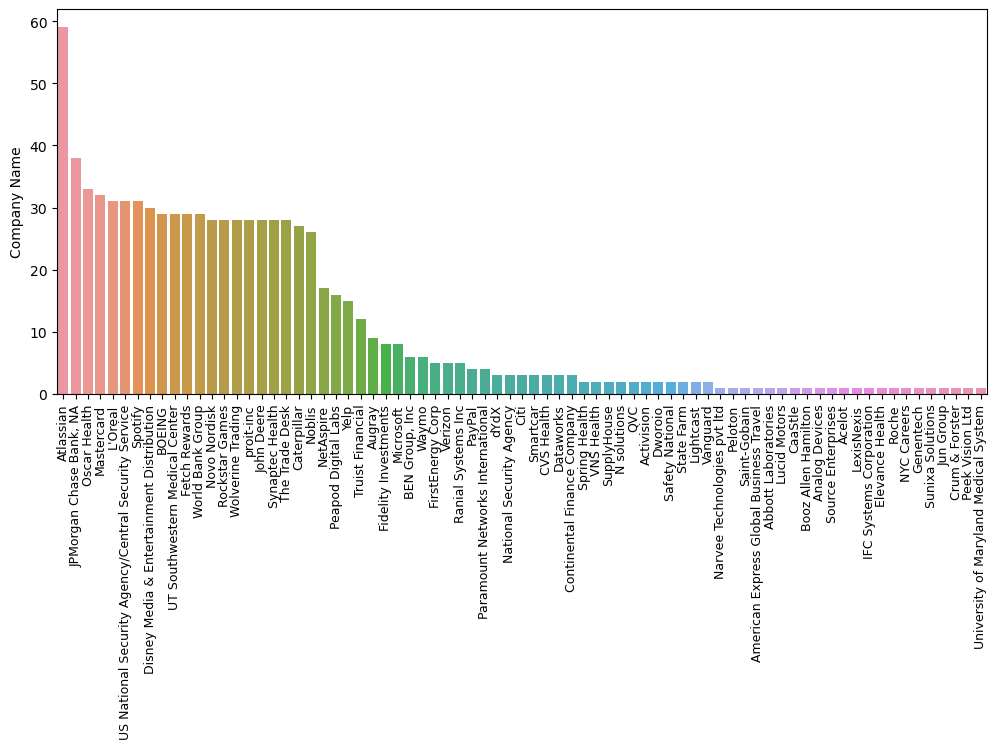

Graph for Location: total = 8


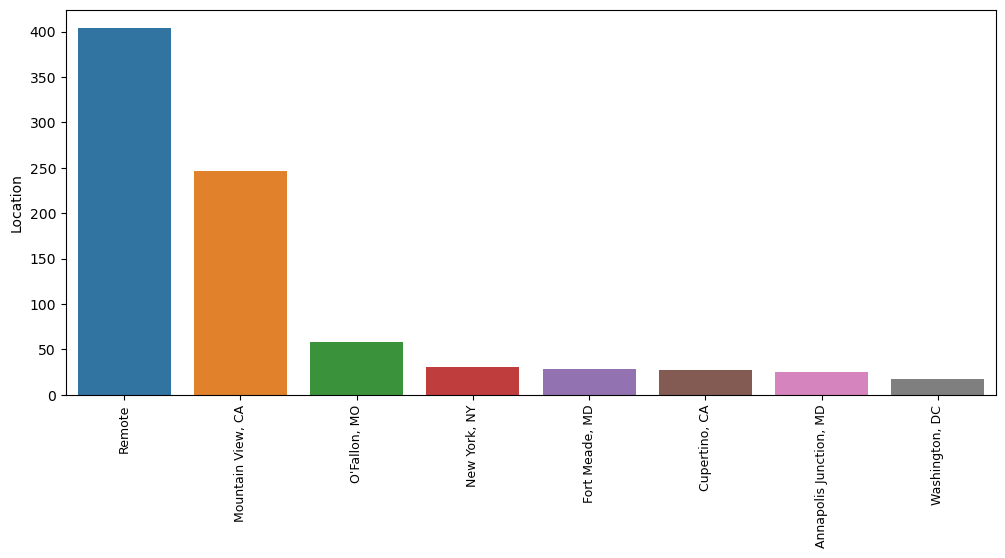

Graph for Headquarters: total = 63


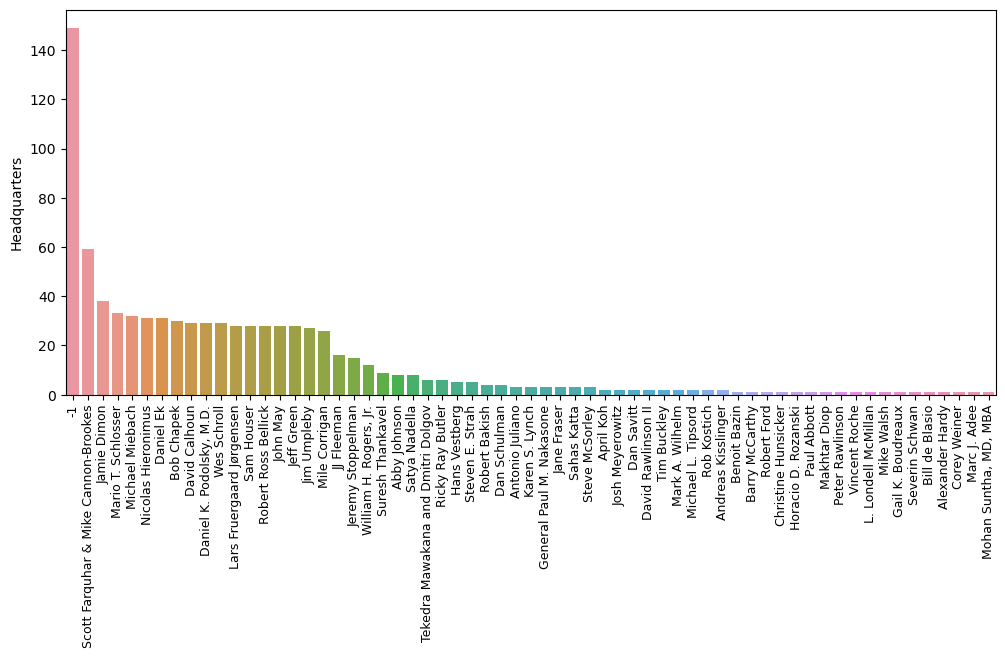

Graph for Comp_Size: total = 8


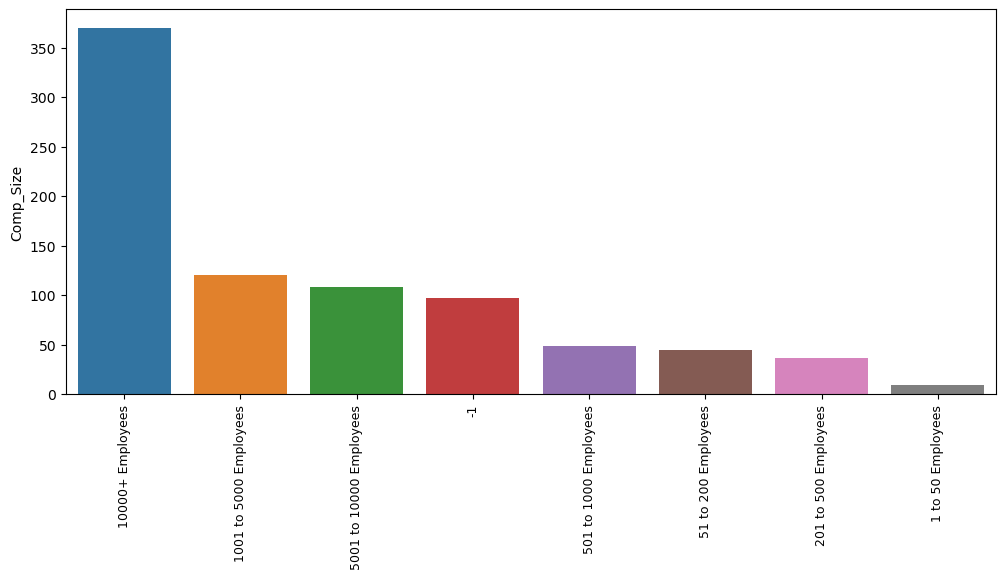

Graph for Type of ownership: total = 10


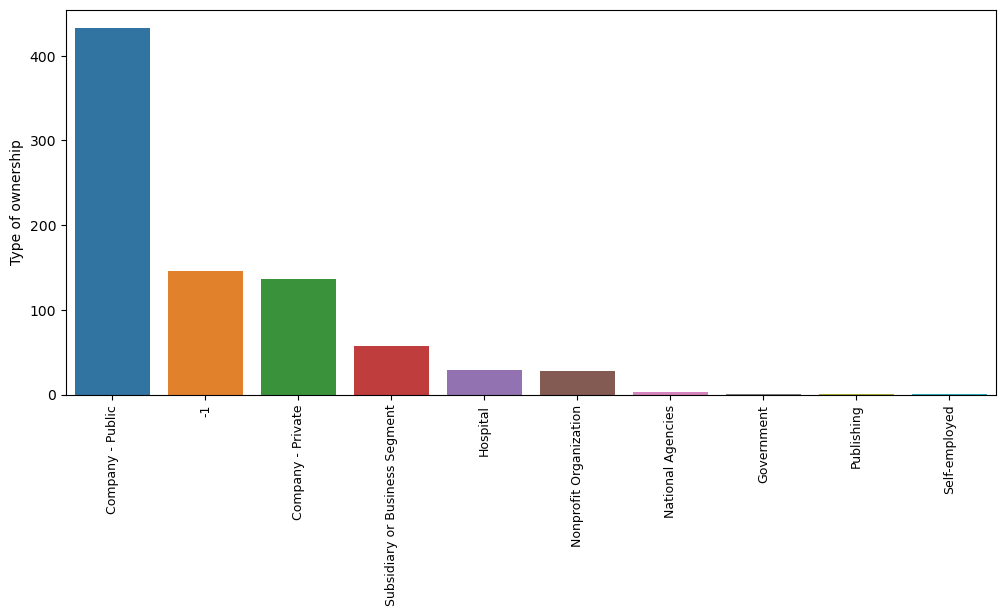

Graph for Industry: total = 30


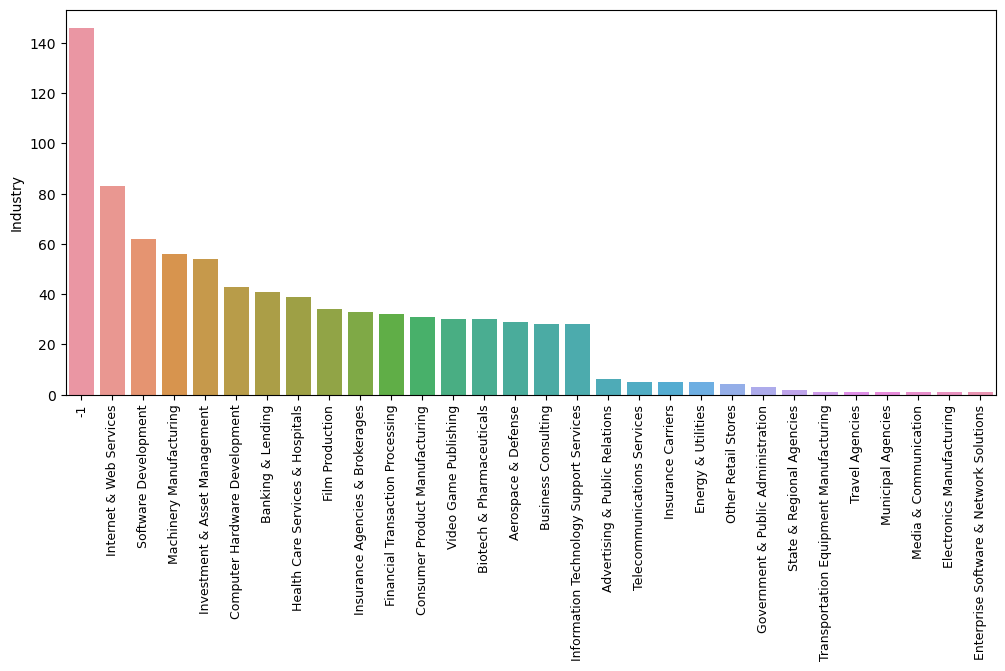

Graph for Sector: total = 15


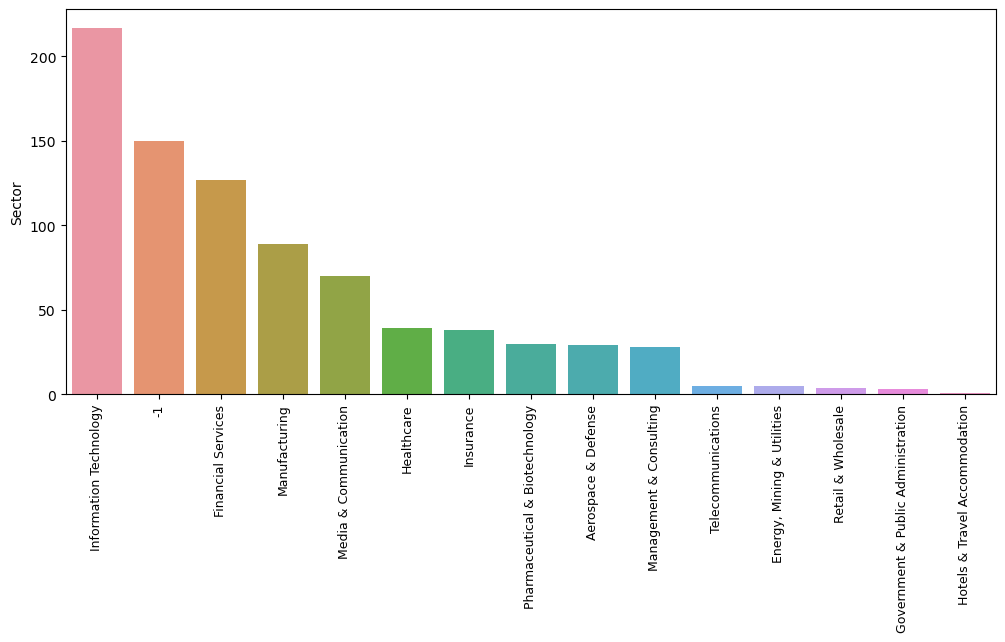

Graph for Revenue: total = 10


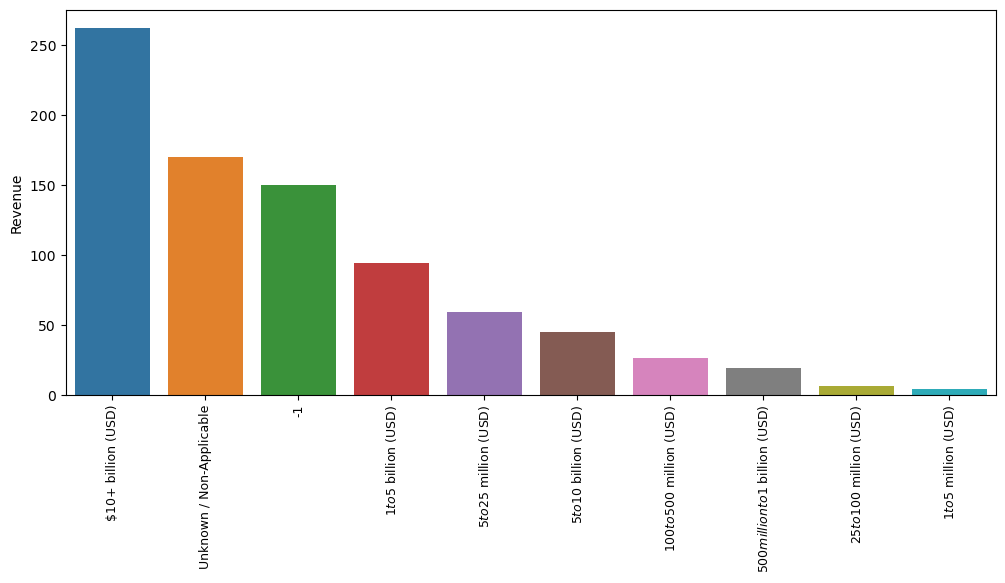

Graph for Comp_Age: total = 50


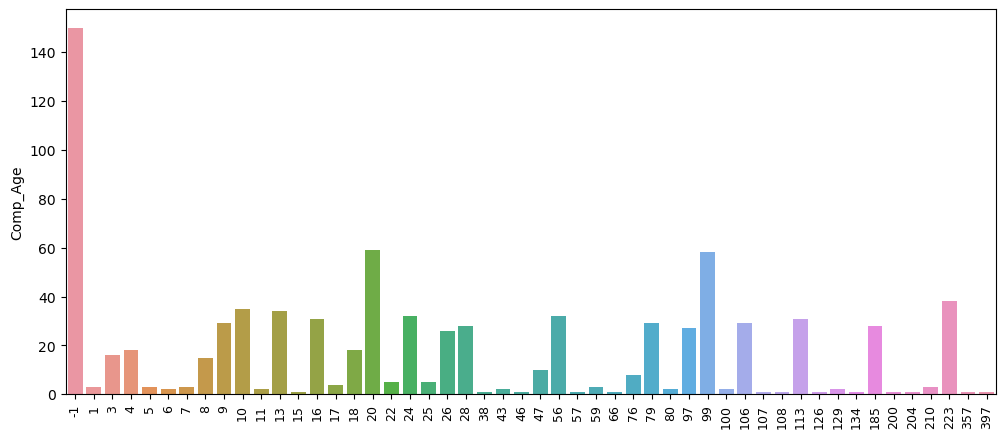

Graph for python_yn: total = 2


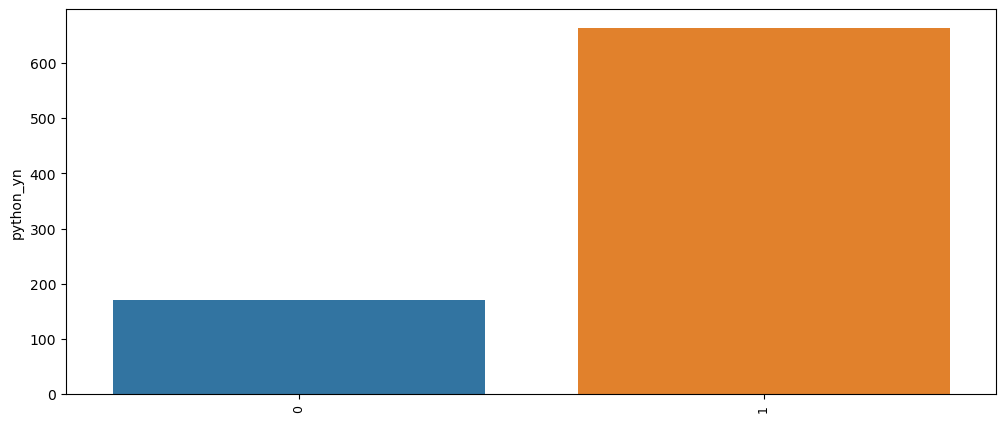

Graph for sql_yn: total = 2


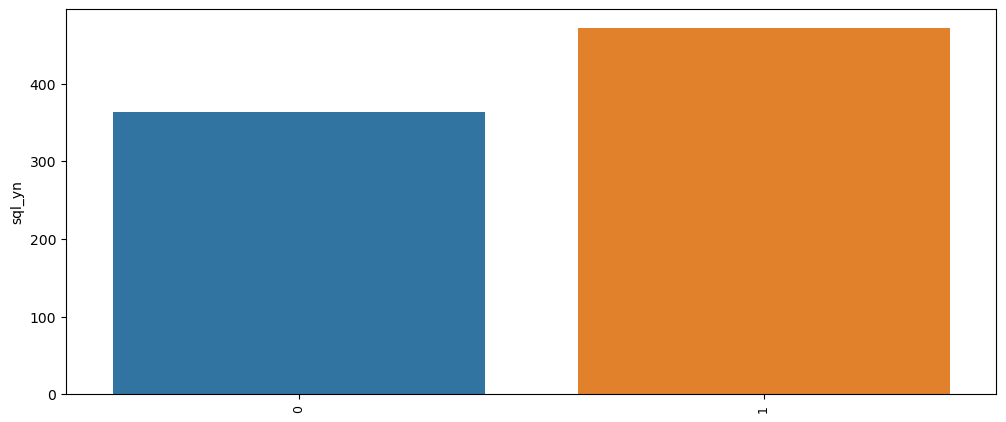

Graph for excel_yn: total = 2


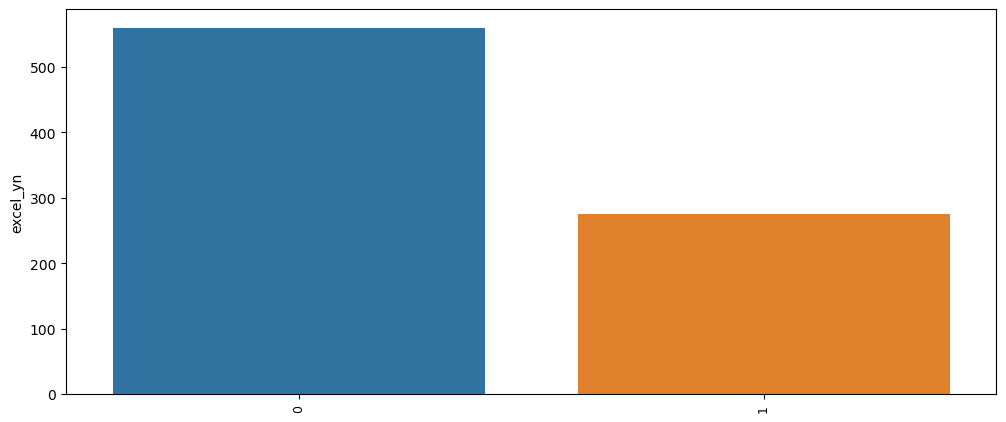

Graph for tableau_yn: total = 2


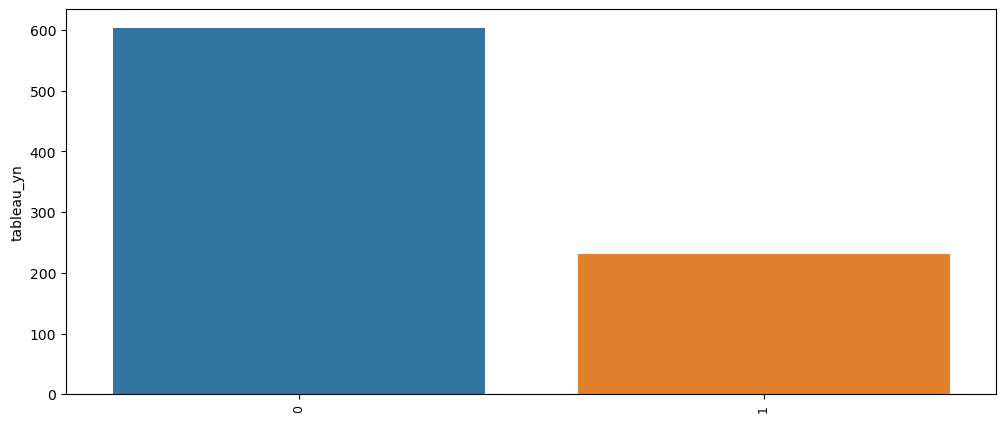

Graph for aws_yn: total = 2


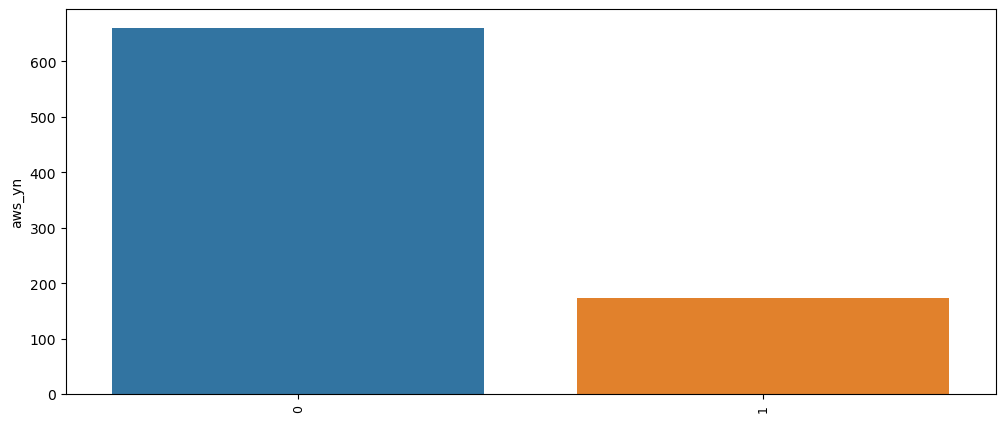

Graph for git_yn: total = 2


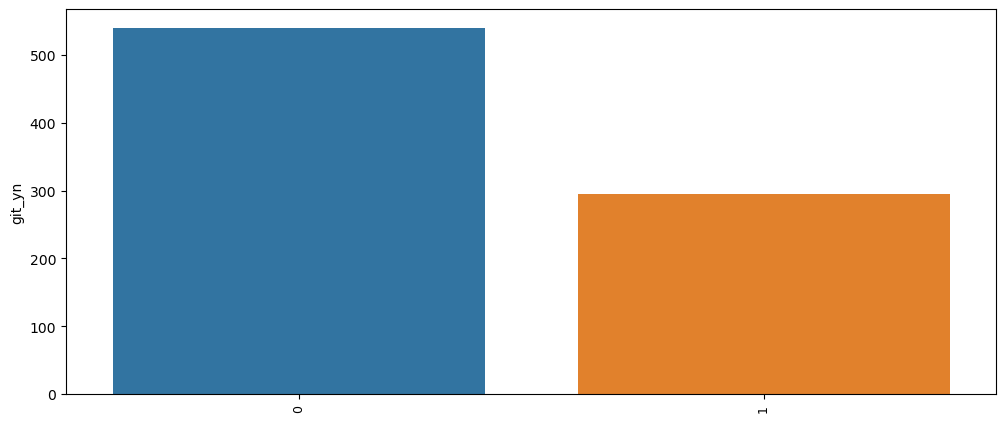

Graph for spark_yn: total = 2


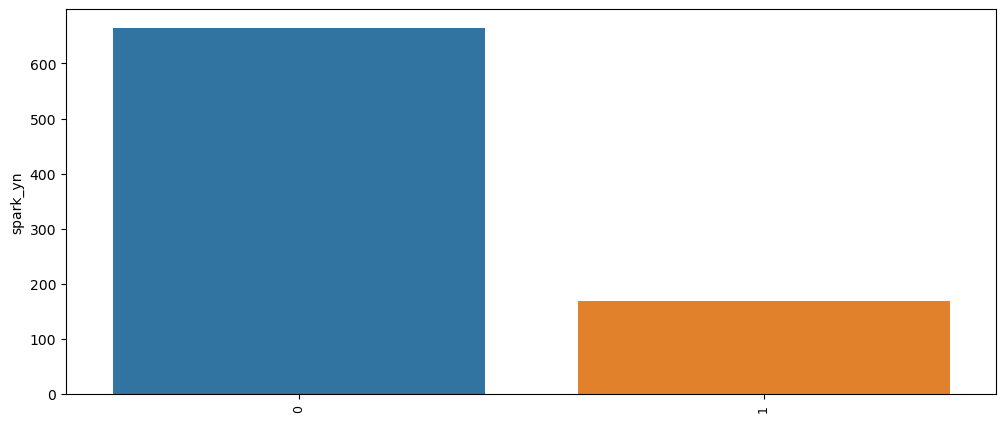

Graph for job_simp: total = 5


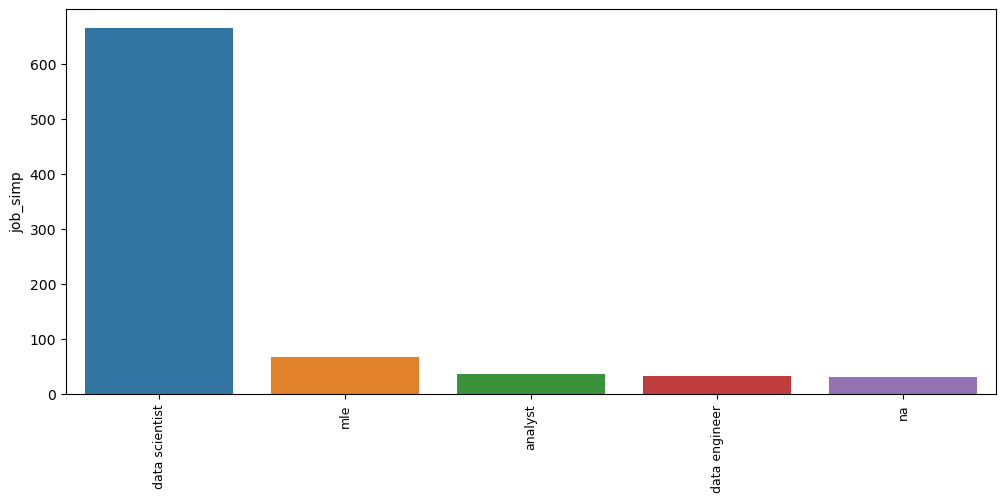

Graph for seniority: total = 3


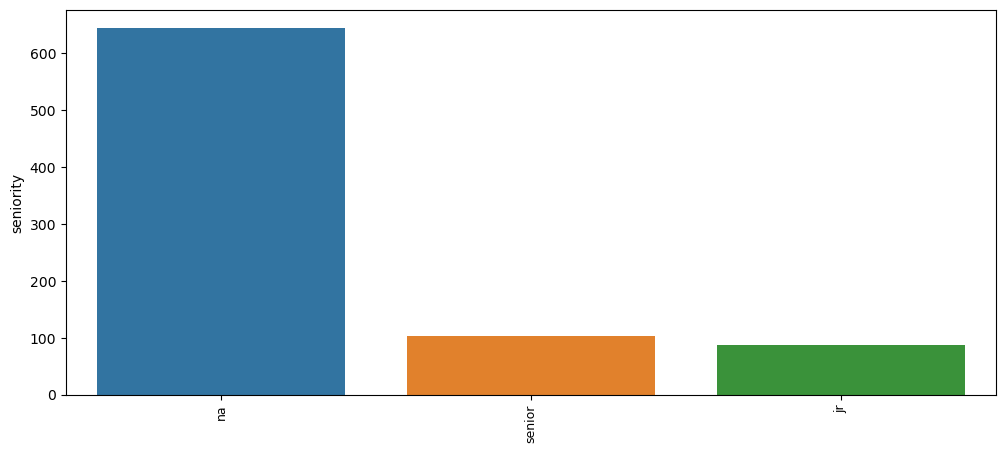

In [22]:
df_cat = df[['Company Name','Location','Headquarters','Comp_Size','Type of ownership',
             'Industry', 'Sector', 'Revenue', 'Comp_Age','python_yn','sql_yn',
             'excel_yn','tableau_yn', 'aws_yn', 'git_yn', 'spark_yn', 'job_simp', 'seniority']]

for col in df_cat.columns:
    plt.figure(figsize=(12,5))
    cat_num = df_cat[col].value_counts()
    print(f"Graph for {col}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90,fontsize=9)
    plt.show()

Graph for Company Name: total = 25


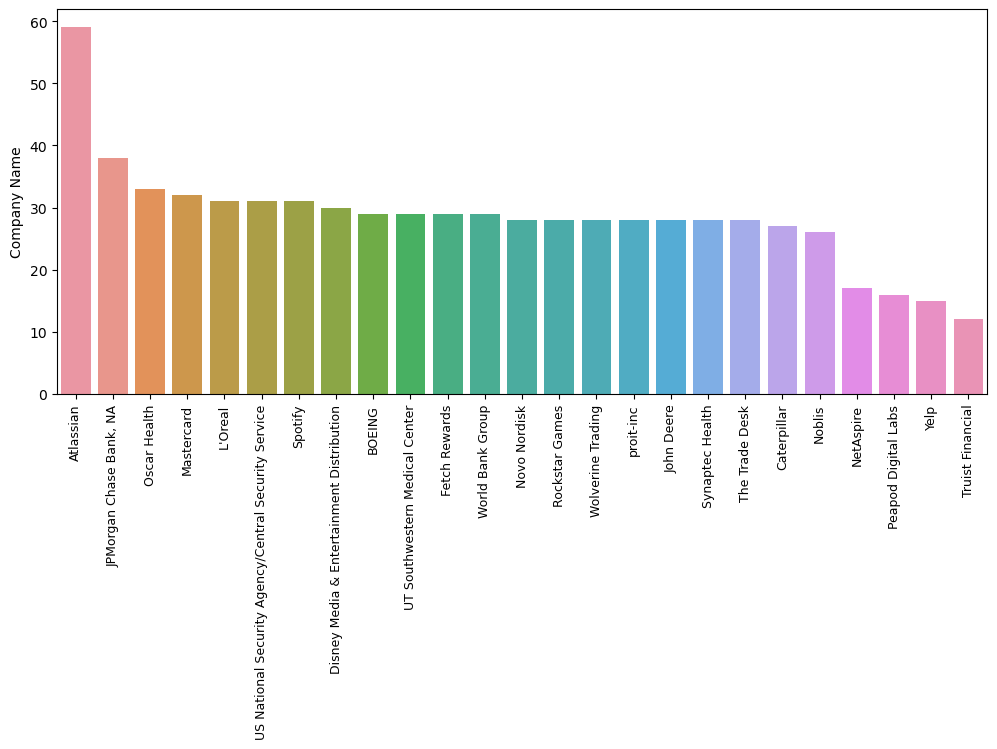

Graph for Headquarters: total = 25


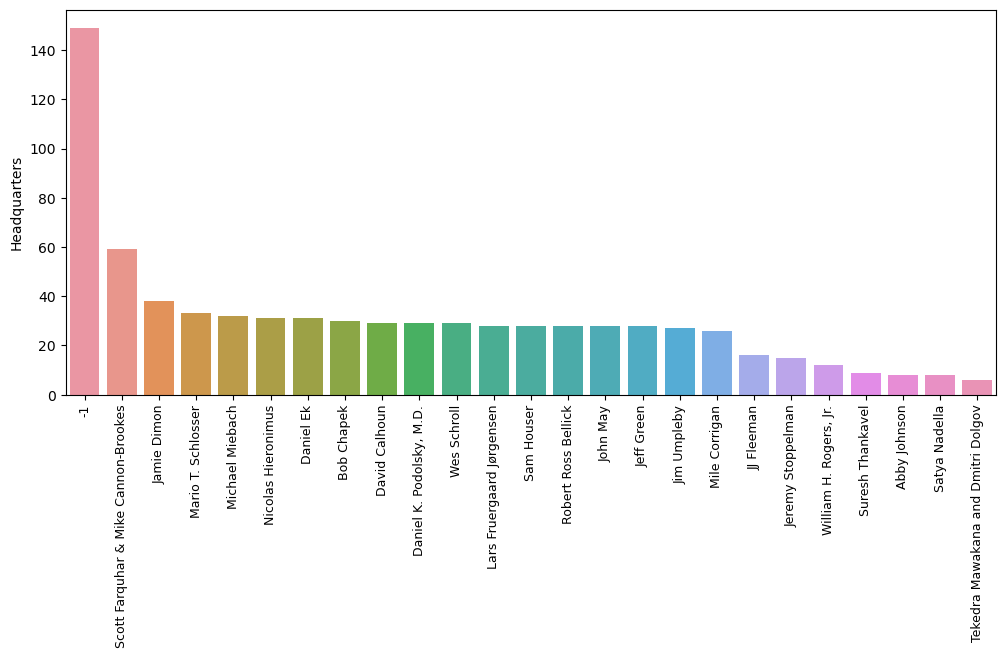

Graph for Location: total = 8


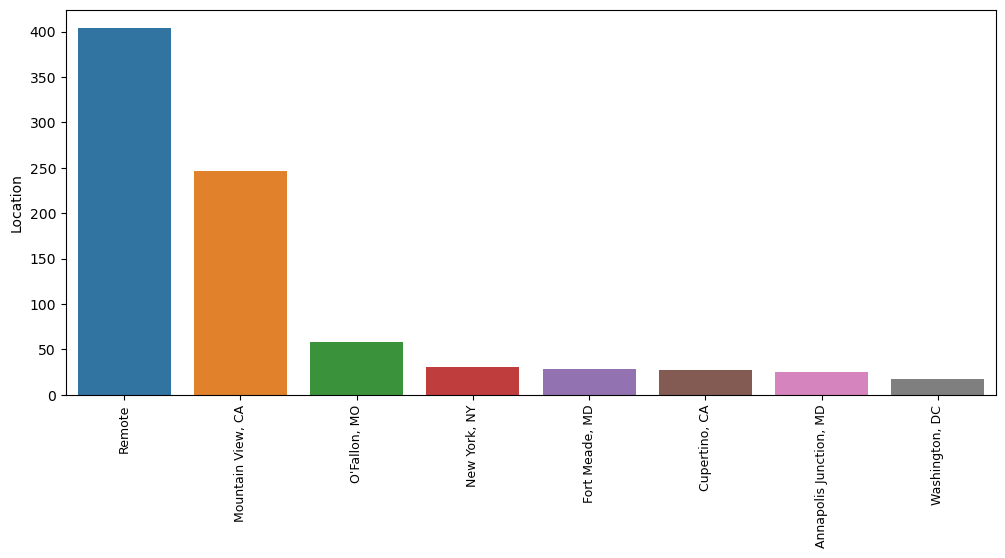

In [23]:
for col in df_cat[['Company Name','Headquarters','Location']]:
    plt.figure(figsize=(12,5))
    cat_num = df_cat[col].value_counts()[:25]
    print(f"Graph for {col}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90,fontsize=9)
    plt.show()

In [24]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,114.291667
data engineer,91.426471
data scientist,121.249249
mle,105.985294
na,110.645161


In [25]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')


avg_salary
job_simp       seniority            
analyst        na         114.291667
data engineer  jr          89.000000
               na         105.500000
data scientist jr          84.675676
               na         118.297170
               senior     150.722222
mle            jr          72.500000
               na         112.308511
               senior     174.000000
na             jr          75.000000
               na         117.500000

In [26]:
pd.pivot_table(df, index=['job_simp','seniority','Location'], values='avg_salary').sort_values('avg_salary',ascending=False)


avg_salary
job_simp       seniority Location                          
mle            senior    O'Fallon, MO            174.000000
                         New York, NY            174.000000
                         Fort Meade, MD          174.000000
data scientist senior    Cupertino, CA           164.000000
                         New York, NY            164.000000
                         Mountain View, CA       153.605263
                         Fort Meade, MD          151.333333
                         Annapolis Junction, MD  148.833333
                         Remote                  148.357143
                         O'Fallon, MO            146.625000
               na        New York, NY            125.695652
                         Fort Meade, MD          122.575000
analyst        na        O'Fallon, MO            121.750000
data scientist na        Annapolis Junction, MD  120.000000
                         O'Fallon, MO            118.236842
                         Remote                  118.188000
                         Mountain View, CA       117.883871
na             na        Annapolis Junction, MD  117.500000
                         Mountain View, CA       117.500000
                         Remote                  117.500000
                         Washington, DC          117.500000
analyst        na        Cupertino, CA           116.833333
mle            na        Fort Meade, MD          116.250000
                         New York, NY            116.250000
data scientist na        Washington, DC          115.166667
analyst        na        Remote                  115.000000
mle            na        O'Fallon, MO            114.500000
data engineer  na        O'Fallon, MO            114.500000
mle            na        Annapolis Junction, MD  114.000000
                         Remote                  112.500000
                         Mountain View, CA       110.911765
                         Cupertino, CA           110.250000
analyst        na        Annapolis Junction, MD  110.000000
                         Mountain View, CA       110.000000
                         New York, NY            110.000000
data scientist na        Cupertino, CA           109.470588
analyst        na        Washington, DC          107.000000
data engineer  na        Cupertino, CA           102.000000
data scientist jr        Cupertino, CA           101.000000
data engineer  na        New York, NY             94.500000
data scientist jr        Washington, DC           93.000000
data engineer  jr        Mountain View, CA        89.000000
                         Annapolis Junction, MD   89.000000
                         Washington, DC           89.000000
                         Remote                   89.000000
data scientist jr        Remote                   87.394737
                         Mountain View, CA        85.900000
                         Annapolis Junction, MD   75.250000
na             jr        Cupertino, CA            75.000000
                         Fort Meade, MD           75.000000
                         New York, NY             75.000000
                         O'Fallon, MO             75.000000
mle            jr        Remote                   72.500000
                         Washington, DC           72.500000
                         Annapolis Junction, MD   72.500000
data scientist jr        O'Fallon, MO             70.500000
                         Fort Meade, MD           57.500000

In [27]:
pd.pivot_table(df, index=['job_simp','seniority','Location'], values='avg_salary', aggfunc= 'count').sort_values('avg_salary',ascending=False)


avg_salary
job_simp       seniority Location                          
data scientist na        Remote                         250
                         Mountain View, CA              155
               senior    Remote                          49
                         Mountain View, CA               38
               na        O'Fallon, MO                    38
                         New York, NY                    23
mle            na        Remote                          20
data scientist na        Fort Meade, MD                  20
               jr        Remote                          19
analyst        na        Remote                          18
data engineer  jr        Remote                          17
data scientist na        Cupertino, CA                   17
mle            na        Mountain View, CA               17
na             na        Remote                          16
data scientist na        Annapolis Junction, MD          15
mle            jr        Remote                          15
data scientist na        Washington, DC                  12
               jr        Mountain View, CA               10
data engineer  jr        Mountain View, CA               10
analyst        na        Mountain View, CA                8
na             na        Mountain View, CA                8
analyst        na        O'Fallon, MO                     4
data scientist senior    O'Fallon, MO                     4
mle            na        O'Fallon, MO                     3
data scientist senior    Fort Meade, MD                   3
               jr        O'Fallon, MO                     3
analyst        na        Cupertino, CA                    3
data scientist senior    Annapolis Junction, MD           3
na             jr        O'Fallon, MO                     2
data engineer  na        Cupertino, CA                    2
                         O'Fallon, MO                     2
data scientist jr        Annapolis Junction, MD           2
mle            senior    O'Fallon, MO                     2
               na        New York, NY                     2
                         Cupertino, CA                    2
                         Fort Meade, MD                   2
               senior    New York, NY                     1
na             jr        New York, NY                     1
               na        Annapolis Junction, MD           1
mle            senior    Fort Meade, MD                   1
na             jr        Fort Meade, MD                   1
                         Cupertino, CA                    1
analyst        na        Annapolis Junction, MD           1
mle            na        Annapolis Junction, MD           1
               jr        Washington, DC                   1
                         Annapolis Junction, MD           1
data scientist senior    New York, NY                     1
                         Cupertino, CA                    1
               jr        Washington, DC                   1
                         Fort Meade, MD                   1
                         Cupertino, CA                    1
data engineer  na        New York, NY                     1
               jr        Washington, DC                   1
                         Annapolis Junction, MD           1
analyst        na        Washington, DC                   1
                         New York, NY                     1
na             na        Washington, DC                   1

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Comp_Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'hourly', 'employer_provided',
       'job_state', 'Comp_Age', 'python_yn', 'sql_yn', 'excel_yn',
       'tableau_yn', 'aws_yn', 'git_yn', 'spark_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [29]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly',
                'employer_provided', 'python_yn', 'sql_yn', 'excel_yn',
                'tableau_yn', 'aws_yn', 'git_yn', 'spark_yn',
                'Type of ownership','avg_salary']]
for col in df_pivots.columns:
    display(pd.pivot_table(df_pivots, index =col, values = 'avg_salary').sort_values('avg_salary', ascending = False))

,avg_salary
Rating,
2,124.906250
3,121.815961
4,116.899736
-1,110.363248


,avg_salary
Industry,
Aerospace & Defense,160.000000
Video Game Publishing,156.650000
Telecommunications Services,150.700000
Software Development,141.983871
Transportation Equipment Manufacturing,134.500000
Enterprise Software & Network Solutions,134.500000
Banking & Lending,131.243902
Insurance Agencies & Brokerages,129.500000
Internet & Web Services,128.891566


,avg_salary
Sector,
Aerospace & Defense,160.000000
Telecommunications,150.700000
Media & Communication,136.378571
Insurance,126.618421
Information Technology,126.474654
Hotels & Travel Accommodation,125.000000
Financial Services,115.244094
-1,113.586667
Pharmaceutical & Biotechnology,113.200000


,avg_salary
Revenue,
$500 million to $1 billion (USD),151.447368
$5 to $25 million (USD),131.898305
Unknown / Non-Applicable,123.847059
$1 to $5 million (USD),119.750000
$10+ billion (USD),119.393130
-1,113.586667
$1 to $5 billion (USD),113.526596
$5 to $10 billion (USD),99.088889
$100 to $500 million (USD),93.000000


,avg_salary
hourly,
0,118.556159
1,63.928571


,avg_salary
employer_provided,
1,128.350559
0,110.403564


,avg_salary
python_yn,
1,120.696536
0,108.008772


,avg_salary
sql_yn,
1,123.413136
0,111.187328


,avg_salary
excel_yn,
0,122.052679
1,110.045455


,avg_salary
tableau_yn,
0,120.278974
1,112.396104


,avg_salary
aws_yn,
0,118.757943
1,115.591954


,avg_salary
git_yn,
0,120.305556
1,114.057627


,avg_salary
spark_yn,
1,119.038235
0,117.857895


,avg_salary
Type of ownership,
National Agencies,125.500000
Subsidiary or Business Segment,124.850877
Company - Public,124.058891
-1,113.390411
Company - Private,111.959559
Publishing,106.500000
Self-employed,94.500000
Nonprofit Organization,93.642857
Hospital,93.500000


ValueError: Grouper for 'avg_salary' not 1-dimensional

In [30]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
-1,52.0,98.0
$1 to $5 billion (USD),28.0,66.0
$1 to $5 million (USD),NaN,4.0
$10+ billion (USD),29.0,233.0
$100 to $500 million (USD),NaN,26.0
$25 to $100 million (USD),NaN,6.0
$5 to $10 billion (USD),32.0,13.0
$5 to $25 million (USD),NaN,59.0
$500 million to $1 billion (USD),1.0,18.0


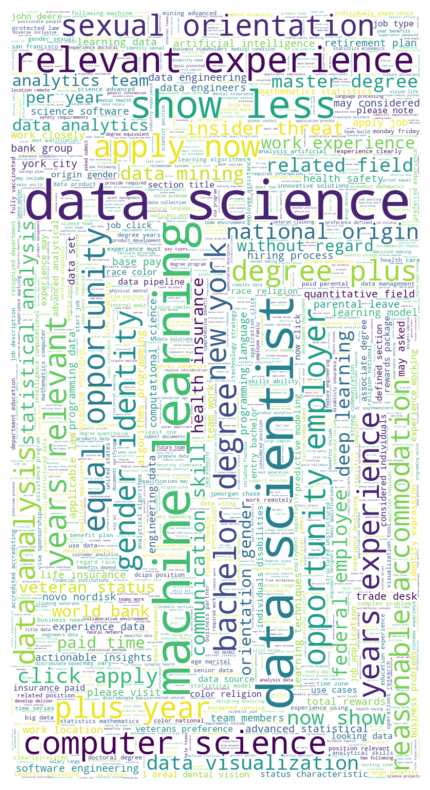

In [37]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_pickle(EXPORT_PATH_PKL)
df.to_csv(EXPORT_PATH_CSV,index=False)